In [1]:
# -*- coding: utf-8 -*-

import numpy as np
from scipy.stats import spearmanr, kendalltau, weightedtau, pearsonr
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

/home/carol/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['figure.titlesize'] = 28
plt.rcParams['legend.fontsize'] = 15

## POPULATION AND MIGRATION DATA UN 2019

In [3]:
population_data = pd.read_csv("data/pop-un2019.csv", index_col=0)

population_data

,Population
Country,
Argentina,44780675
Australia,25203200
Brazil,211049519
Chile,18952035
France,65129731
Great Britain,67530161
Indonesia,270625567
Japan,126860299
Malaysia,31949789


In [4]:
migration_data = pd.read_csv("data/migration-un2019.csv", index_col=0)
migration_data.fillna(0, inplace=True)

migration_data

,Total,Total16,Argentina,Australia,Brazil,Chile,France,Great Britain,Indonesia,Japan,Malaysia,Mexico,Russia,Singapore,South Korea,Spain,Turkey,United States
Destination,,,,,,,,,,,,,,,,,,
Argentina,2212879,397927,0,279,49647,216855,8303,959,21,4531,2,1475,1917,2,8296,99769,646,5225
Australia,7549270,2109825,17583,0,42552,33707,40733,1262204,87274,53175,174136,6760,28735,64739,121204,19594,42880,114549
Brazil,807006,229897,39078,791,0,20747,12851,6650,978,65955,163,3601,1865,154,11531,41321,486,23726
Chile,939992,177893,72813,3952,20370,0,12562,6668,343,3231,100,6887,2344,237,4247,22842,1019,20278
France,8334875,1110686,14253,9192,63208,15857,0,176672,5446,23536,2793,13851,70463,2512,22794,303245,327508,59356
Great Britain,9552110,1073094,12239,145692,47487,8668,170142,0,11543,52930,84638,10457,38917,58432,13171,98372,104491,215915
Indonesia,353135,135623,0,11325,0,0,0,32693,0,19748,2363,0,0,23524,33357,0,0,12613
Japan,2498891,836055,3273,10892,189735,0,12206,17255,44937,0,9526,2416,8710,2735,475166,2883,0,56321
Malaysia,3430380,1356249,0,6076,0,0,0,11273,1225156,18825,0,0,0,91002,3917,0,0,0


In [5]:
for country in list(migration_data.index):
    # proportion of immigrants from country C between the immigrant population
    migration_data["%mig_"+country] = 100 * migration_data[country] / migration_data["Total"]
    # proportion of immigrants from country C between the immigrant population considering just 16 countries
    migration_data["%mig16_"+country] = 100 * migration_data[country] / migration_data["Total"]

In [6]:
for country in list(migration_data.index):
    # proportion of immigrants from country C between the WHOLE population
    migration_data["%pop_"+country] = 100 * migration_data[country] / population_data['Population']

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]), <a list of 16 Text xticklabel objects>)

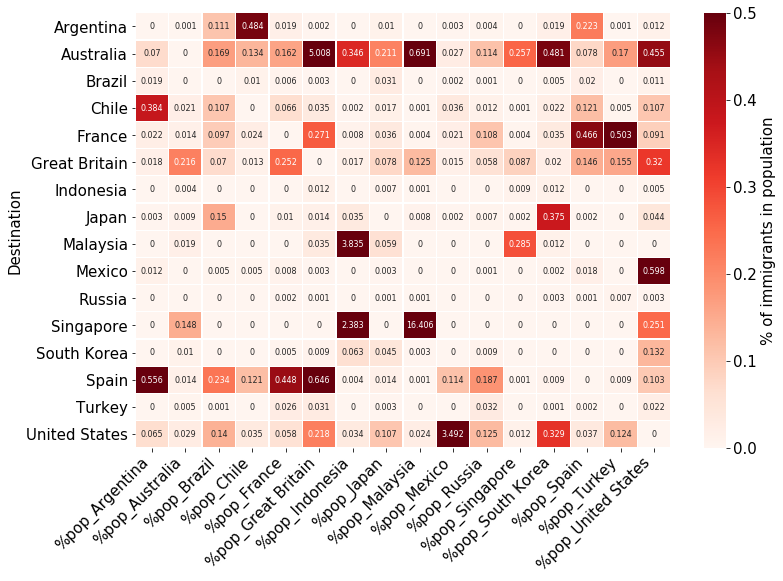

In [7]:
migration_data_plot = migration_data.filter(regex='%pop').round(3)

plt.subplots(figsize=(12, 8))
sns.heatmap(migration_data_plot, annot=True, cmap="Reds", vmin=0, vmax=0.5, linewidths=.2, annot_kws={"size":8}, fmt='g', cbar_kws={'label': '% of immigrants in population'})
plt.xticks(rotation=45, horizontalalignment='right')

## Proportion of immigrants/population

In [8]:
mig_pop_data = migration_data.filter(regex='%pop')
mig_pop_data.columns = mig_pop_data.columns.str.replace('^%pop_', '')
mig_pop_data

,Argentina,Australia,Brazil,Chile,France,Great Britain,Indonesia,Japan,Malaysia,Mexico,Russia,Singapore,South Korea,Spain,Turkey,United States
Destination,,,,,,,,,,,,,,,,
Argentina,0.000000,0.000623,0.110867,0.484260,0.018541,0.002142,0.000047,0.010118,0.000004,0.003294,0.004281,0.000004,0.018526,0.222795,0.001443,0.011668
Australia,0.069765,0.000000,0.168836,0.133741,0.161618,5.008110,0.346281,0.210985,0.690928,0.026822,0.114013,0.256868,0.480907,0.077744,0.170137,0.454502
Brazil,0.018516,0.000375,0.000000,0.009830,0.006089,0.003151,0.000463,0.031251,0.000077,0.001706,0.000884,0.000073,0.005464,0.019579,0.000230,0.011242
Chile,0.384196,0.020853,0.107482,0.000000,0.066283,0.035184,0.001810,0.017048,0.000528,0.036339,0.012368,0.001251,0.022409,0.120525,0.005377,0.106996
France,0.021884,0.014113,0.097049,0.024347,0.000000,0.271262,0.008362,0.036137,0.004288,0.021267,0.108189,0.003857,0.034998,0.465601,0.502855,0.091135
Great Britain,0.018124,0.215744,0.070320,0.012836,0.251950,0.000000,0.017093,0.078380,0.125334,0.015485,0.057629,0.086527,0.019504,0.145671,0.154732,0.319731
Indonesia,0.000000,0.004185,0.000000,0.000000,0.000000,0.012081,0.000000,0.007297,0.000873,0.000000,0.000000,0.008692,0.012326,0.000000,0.000000,0.004661
Japan,0.002580,0.008586,0.149562,0.000000,0.009622,0.013602,0.035422,0.000000,0.007509,0.001904,0.006866,0.002156,0.374558,0.002273,0.000000,0.044396
Malaysia,0.000000,0.019017,0.000000,0.000000,0.000000,0.035283,3.834629,0.058921,0.000000,0.000000,0.000000,0.284828,0.012260,0.000000,0.000000,0.000000


In [9]:
mig_orig_dict = dict()
mig_orig_dict_sorted = dict()

for country in mig_pop_data.index.to_list():
    mig_orig_dict[country] = dict(mig_pop_data[country].drop(country))
    mig_orig_dict_sorted[country] = dict(sorted(mig_orig_dict[country].items(), key=lambda item: item[1], reverse=True))

In [10]:
mig_dest_dict = dict()
mig_dest_dict_sorted = dict()

for country in mig_pop_data.index.to_list():
    mig_dest_dict[country] = dict(mig_pop_data.loc[country].drop(country))
    mig_dest_dict_sorted[country] = dict(sorted(mig_dest_dict[country].items(), key=lambda item: item[1], reverse=True))

In [11]:
mig_dest_dict_sorted

{'Argentina': {'Chile': 0.48426023055704276,
  'Spain': 0.22279476582253394,
  'Brazil': 0.11086702020458601,
  'France': 0.01854148022556605,
  'South Korea': 0.018525848482632296,
  'United States': 0.011667979546980924,
  'Japan': 0.01011820389040585,
  'Russia': 0.004280864457715298,
  'Mexico': 0.0032938315467553807,
  'Great Britain': 0.0021415487819243456,
  'Turkey': 0.001442586562172187,
  'Australia': 0.0006230366112167804,
  'Indonesia': 4.689522880126304e-05,
  'Malaysia': 4.466212266786957e-06,
  'Singapore': 4.466212266786957e-06},
 'Australia': {'Great Britain': 5.008110081259523,
  'Malaysia': 0.6909281361097004,
  'South Korea': 0.48090718638902996,
  'United States': 0.4545018092940579,
  'Indonesia': 0.3462814245810056,
  'Singapore': 0.25686817546978163,
  'Japan': 0.21098511300152362,
  'Turkey': 0.17013712544438803,
  'Brazil': 0.1688357034027425,
  'France': 0.16161836592178772,
  'Chile': 0.13374095352971052,
  'Russia': 0.1140132998984256,
  'Spain': 0.07774409

## Asymmetric Cultural Similarity

In [12]:
asym_cultsim_data = pd.read_csv("data/cultural-similarity-nonsymmetric.csv", index_col=0)
asym_cultsim_data

,Argentina,Australia,Brazil,Chile,France,Great Britain,Indonesia,Japan,Malaysia,Mexico,Russia,Singapore,South Korea,Spain,Turkey,United States
interests_from,,,,,,,,,,,,,,,,
Argentina,1.000000,0.318567,0.107796,0.466730,-0.410868,-0.207280,-0.677962,-0.815936,-0.263883,0.344139,-0.694557,0.145924,-0.524286,0.035432,-0.724250,-0.030646
Australia,-0.255348,1.000000,-0.508155,-0.408968,-0.231631,0.279978,-0.747323,-0.501121,0.190184,-0.568518,-0.631861,0.369168,-0.434273,-0.322293,-0.851730,0.629218
Brazil,0.217246,0.202120,1.000000,0.117010,-0.523958,-0.041635,-0.493768,-0.648151,0.153331,-0.131074,-0.667598,0.013580,-0.321865,-0.074772,-0.714663,-0.078814
Chile,0.409019,0.099224,0.027488,1.000000,-0.576472,-0.269875,-0.589764,-0.512627,0.003410,0.514436,-0.681028,0.090223,-0.491062,0.066057,-0.769621,0.118722
France,-0.219271,0.346578,-0.573227,-0.298198,1.000000,0.118826,-0.493732,-0.439505,0.133435,-0.118451,-0.622886,0.129284,-0.396102,0.049921,-0.307114,0.301769
Great Britain,-0.366881,0.597763,-0.484574,-0.371741,-0.325941,1.000000,-0.671900,-0.546641,0.135017,-0.579594,-0.629021,0.357294,-0.350316,-0.192754,-0.758729,0.507604
Indonesia,-0.317599,0.340407,-0.330441,-0.327292,-0.472113,-0.135466,1.000000,-0.444311,0.537021,-0.308937,-0.531329,0.187354,-0.188713,-0.484058,-0.482021,0.100554
Japan,-0.517957,0.279089,-0.252696,-0.297352,-0.423019,-0.180318,-0.293909,1.000000,0.360119,-0.238884,-0.505290,0.555772,0.134619,-0.413593,-0.328614,-0.018032
Malaysia,-0.828872,0.408905,-0.760682,-0.619157,-0.627630,-0.684270,-0.262423,-0.881483,1.000000,-0.721838,-0.765957,0.715415,-0.337267,-0.861775,-0.855060,0.026759


In [13]:
cs_row_dict = dict()
cs_row_dict_sorted = dict()

for country in asym_cultsim_data.index.to_list():
    cs_row_dict[country] = dict(asym_cultsim_data.loc[country].drop(country))
    cs_row_dict_sorted[country] = dict(sorted(cs_row_dict[country].items(), key=lambda item: item[1], reverse=True))

In [14]:
cs_column_dict = dict()
cs_column_dict_sorted = dict()

for country in asym_cultsim_data.index.to_list():
    cs_column_dict[country] = dict(asym_cultsim_data[country].drop(country))
    cs_column_dict_sorted[country] = dict(sorted(cs_column_dict[country].items(), key=lambda item: item[1], reverse=True))

In [15]:
cs_column_dict_sorted

{'Argentina': {'Chile': 0.409019423067681,
  'Mexico': 0.309985593453363,
  'Brazil': 0.21724563043706302,
  'Spain': 0.169608812283336,
  'Russia': -0.15649224701310802,
  'Turkey': -0.19194844003119801,
  'France': -0.21927129016984698,
  'Australia': -0.255347503615535,
  'United States': -0.284854077738873,
  'Indonesia': -0.31759938548836997,
  'Great Britain': -0.366881491109128,
  'South Korea': -0.49827893498922293,
  'Japan': -0.51795719766755,
  'Singapore': -0.6528810890348621,
  'Malaysia': -0.828871973880408},
 'Australia': {'United States': 0.6407843043233871,
  'Great Britain': 0.59776337892136,
  'Malaysia': 0.408904609333549,
  'France': 0.346577605753629,
  'Indonesia': 0.340406762247939,
  'Argentina': 0.318566522267763,
  'Singapore': 0.31656298078436496,
  'Japan': 0.27908948542112105,
  'Turkey': 0.27052948394405,
  'Brazil': 0.202120237222094,
  'South Korea': 0.14811349619078304,
  'Spain': 0.12172964068489399,
  'Chile': 0.099223524742849,
  'Mexico': 0.0353744

## Comparing Asymmetric Cultural Similarity and Migration

In [16]:
def proportion (v1, v2):
    return len(set(v1).intersection(set(v2)))/len(v1)

In [17]:
#SPEARMAN R between values
#mig_dest_dict and cs_column_dict

k = 5

corr_dict = dict()

for i, country in enumerate(mig_dest_dict):
    s, ps = (spearmanr(list(mig_dest_dict[country].values()), list(cs_column_dict[country].values())))
    p = proportion(list(mig_dest_dict_sorted[country].keys())[:k], list(cs_column_dict_sorted[country].keys())[:k])
    
    corr_dict[country] = {"Spearmanr": round(s,2) , "p-value": round(ps,2), "Proportion": p}

    print(str(country) + " & " + str(round(s,2)) + " (" + str(round(ps,2)) + ") & " + str(p))

Argentina & 0.61 (0.02) & 0.6
Australia & 0.65 (0.01) & 0.8
Brazil & 0.54 (0.04) & 0.8
Chile & 0.74 (0.0) & 0.6
France & 0.65 (0.01) & 0.8
Great Britain & 0.62 (0.01) & 0.8
Indonesia & -0.17 (0.55) & 0.2
Japan & 0.08 (0.78) & 0.2
Malaysia & 0.75 (0.0) & 0.6
Mexico & 0.55 (0.03) & 0.4
Russia & 0.11 (0.7) & 0.6
Singapore & 0.5 (0.06) & 0.4
South Korea & 0.07 (0.81) & 0.4
Spain & 0.82 (0.0) & 0.6
Turkey & 0.31 (0.25) & 0.4
United States & 0.02 (0.94) & 0.4


In [18]:
for corr in sorted(corr_dict.items(), key=lambda item: item[1]['Spearmanr'], reverse=True):
    print(str(corr[0]) + " & " + str(corr[1]['Spearmanr']) + " (" + str(corr[1]['p-value']) + ") & " + str(corr[1]['Proportion']))

Spain & 0.82 (0.0) & 0.6
Malaysia & 0.75 (0.0) & 0.6
Chile & 0.74 (0.0) & 0.6
Australia & 0.65 (0.01) & 0.8
France & 0.65 (0.01) & 0.8
Great Britain & 0.62 (0.01) & 0.8
Argentina & 0.61 (0.02) & 0.6
Mexico & 0.55 (0.03) & 0.4
Brazil & 0.54 (0.04) & 0.8
Singapore & 0.5 (0.06) & 0.4
Turkey & 0.31 (0.25) & 0.4
Russia & 0.11 (0.7) & 0.6
Japan & 0.08 (0.78) & 0.2
South Korea & 0.07 (0.81) & 0.4
United States & 0.02 (0.94) & 0.4
Indonesia & -0.17 (0.55) & 0.2


### Plotting Rankings

In [19]:
def plot_ranking(ranking_migration, ranking_other, country, name=None, note=None):
    
    ranking_original_int = dict()
    for i,location in enumerate(ranking_migration):
        ranking_original_int[location] = len(ranking_migration) - i
    
    pallet1 = ['#8dd3c7', '#ffffb3', '#bebada', '#fb8072', '#80b1d3', '#fdb462', '#b3de69', '#fccde5', '#d9d9d9', '#bc80bd']
    pallet2 = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a']
    pallet3 = ['#a50026', '#d73027', '#f46d43', '#fdae61', '#fee090', '#e0f3f8', '#abd9e9', '#74add1', '#4575b4', '#313695']
    pallet4 = ['#6f0000', '#7f0000', '#8f0000', '#9f0000', '#af0000', '#bf0000', '#cf0000', '#df0000', '#ef0000', '#ff0000']
    greys = ['#808080']*10

    ranks = dict()
    for location in ranking_migration:
        ranks[location] = [ranking_original_int[location]]

    for i, location in enumerate(ranking_other):
        ranks[location] += [len(ranking_other) - i] 


    tableau20 = pallet2 + greys + greys


#     # Remove the plot frame lines. They are unnecessary chartjunk.    
#     ax = plt.subplot(111)    
#     ax.spines["top"].set_visible(False)    
#     ax.spines["bottom"].set_visible(False)    
#     ax.spines["right"].set_visible(False)    
#     ax.spines["left"].set_visible(False)    

#     # Ensure that the axis ticks only show up on the bottom and left of the plot.    
#     # Ticks on the right and top of the plot are generally unnecessary chartjunk.    
#     ax.get_xaxis().tick_bottom()    
#     ax.get_yaxis().tick_left()    

    # Limit the range of the plot to only where the data is.    
    # Avoid unnecessary whitespace.    
    plt.ylim(0, 16)    
    plt.xlim(1, 1.5)    

    # Make sure your axis ticks are large enough to be easily read.    
    # You don't want your viewers squinting to read your plot. 
    y_ticks_label, y_ticks = zip(*sorted(ranking_original_int.items(), key=lambda kv:kv[1]))
    plt.yticks(y_ticks, y_ticks_label, fontsize=18)    
    
    if name == "from":
        plt.xticks([1,1.5], ["Migrants \n " + name + " " + country, 
                             "Cultural Similarity \n popular food in " + country], fontsize=18)    

    else:
        plt.xticks([1,1.5], ["Largest immigrant \n communities", 
                             "Most popular \n cuisines"], fontsize=18)  
        
    # Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
    plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                    labelbottom="on", left="off", right="off", labelleft="on")    

    locations = ranking_migration

    for i, location in enumerate(ranking_migration):    
        if i < 10: 
            plt.plot([1,1.5], ranks[location], lw=4, color=tableau20[i])    
        else:
            plt.plot([1,1.5], ranks[location], lw=2, color=tableau20[i]) 

        # Add a text label to the right end of every line. Most of the code below    
        # is adding specific offsets y position because some labels overlapped.    
        y_pos = ranks[location][1]

        plt.text(1.55, y_pos, location, fontsize=18, color=tableau20[i])    
    plt.tight_layout()
    plt.savefig("figs/ranks/rank-mig-pop-" + name + "_" + country + "_CS_" + note + ".png", bbox_inches="tight")
    plt.show()


In [20]:
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False

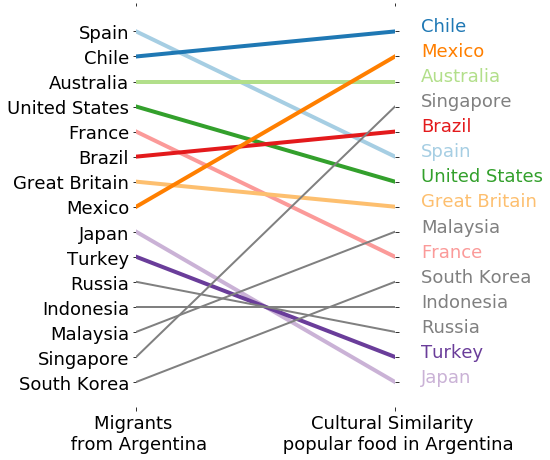

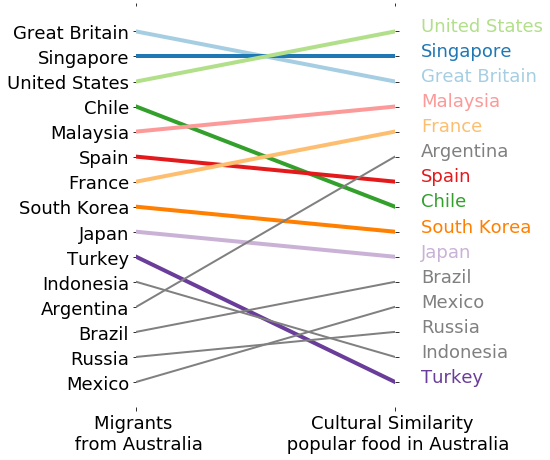

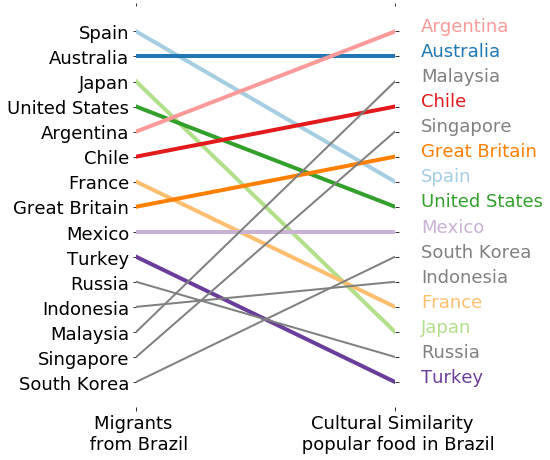

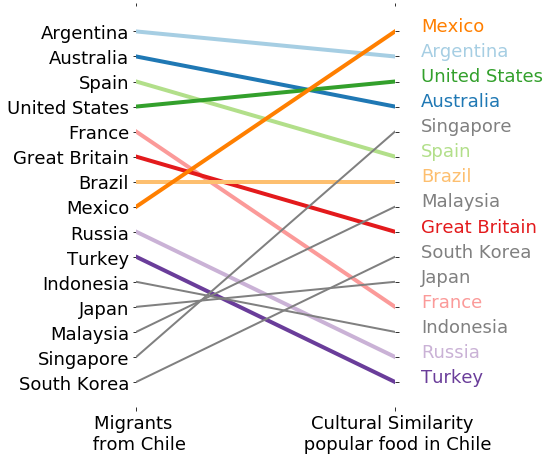

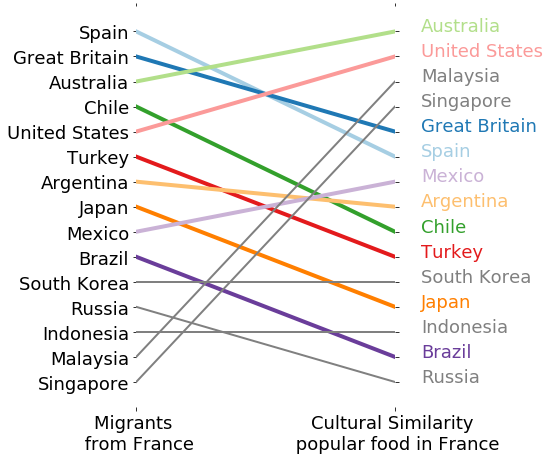

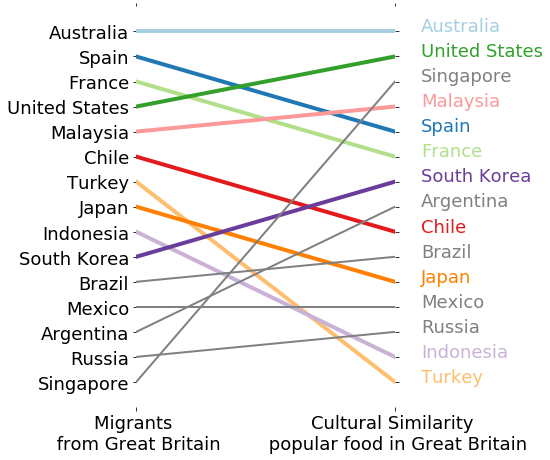

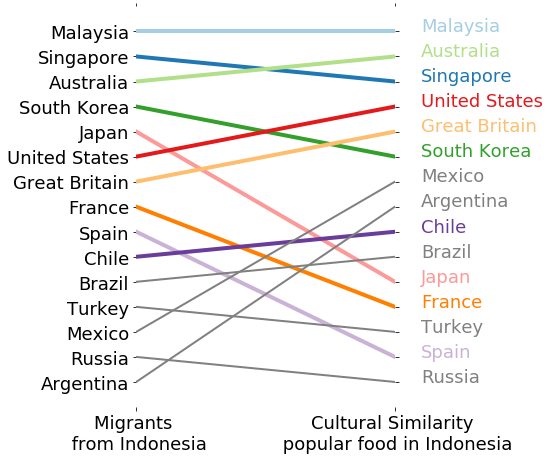

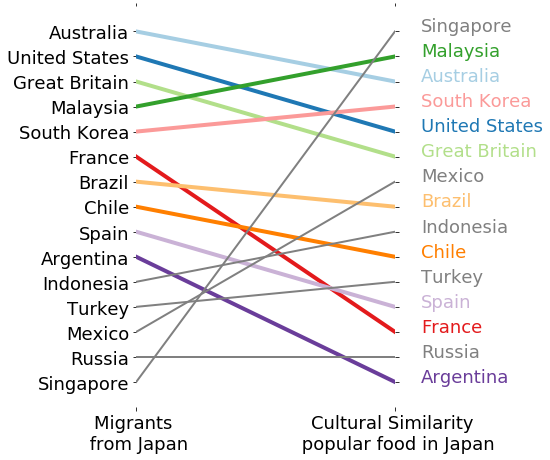

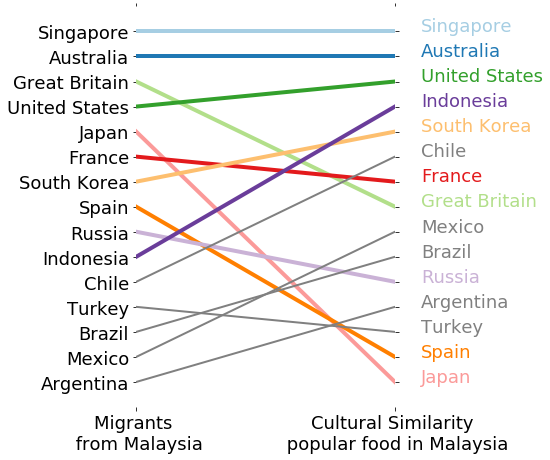

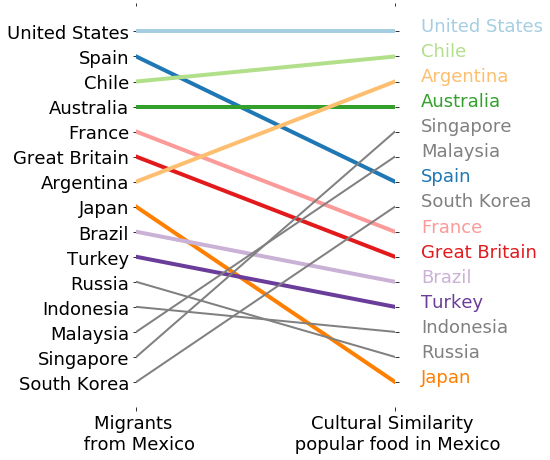

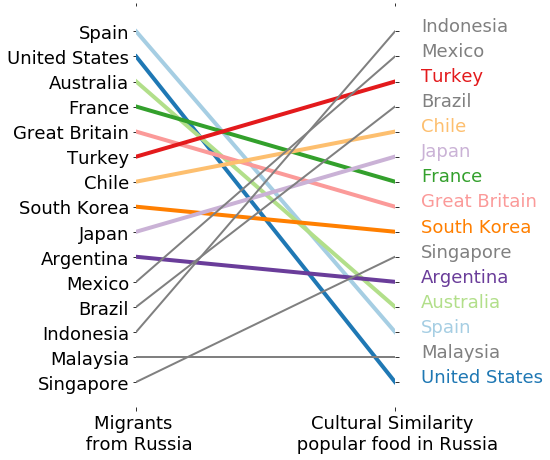

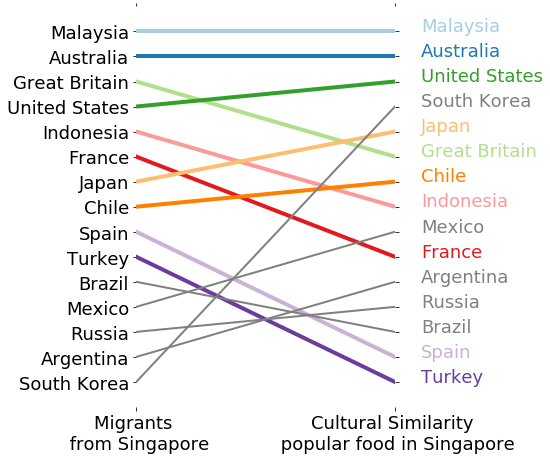

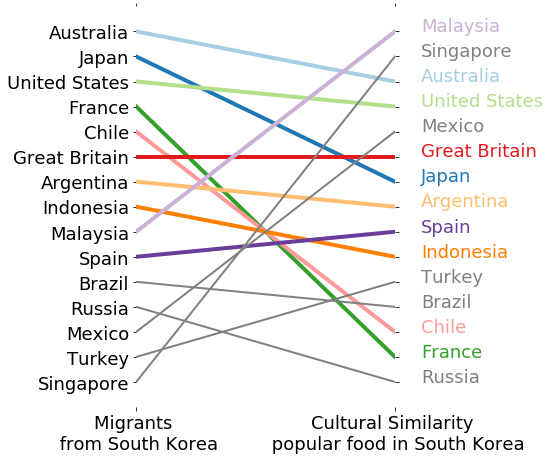

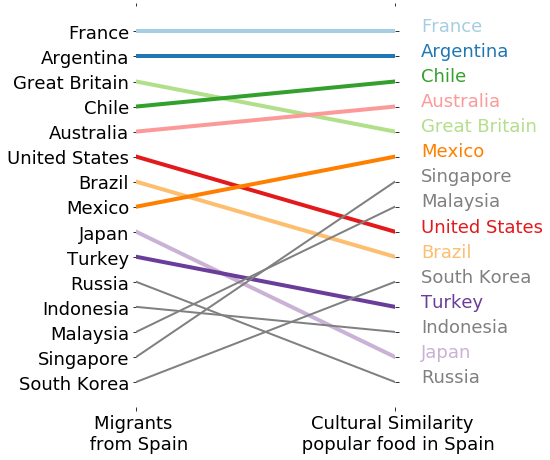

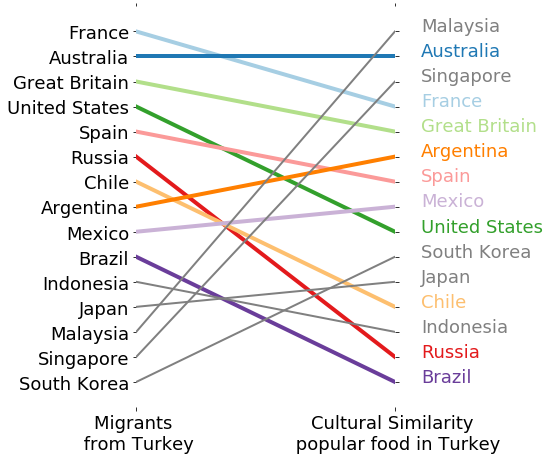

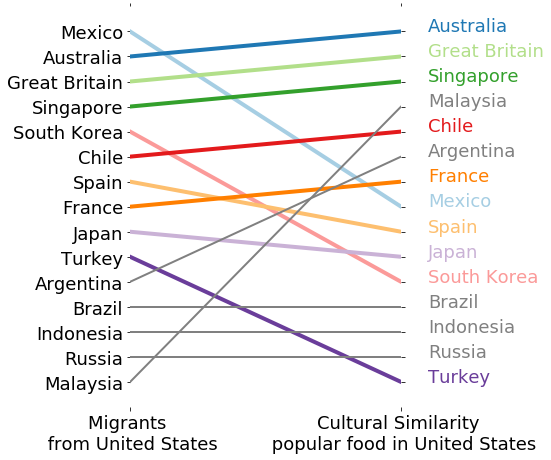

In [21]:
plt.rcParams["figure.figsize"] = (8, 6.5)

r_mig_orig = dict()
r_cs_row = dict()

for country in mig_orig_dict_sorted:
    r_mig_orig[country] = list(mig_orig_dict_sorted[country].keys())
    r_cs_row[country] = list(cs_row_dict_sorted[country].keys())
     
for country in mig_orig_dict:
    plot_ranking(r_mig_orig[country], r_cs_row[country], country, name="from", note="Row")

Argentina


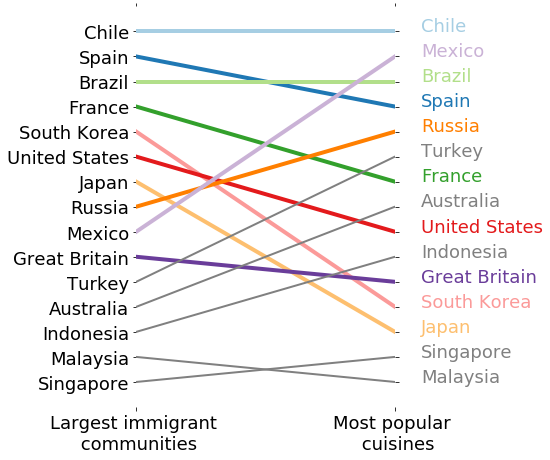

Australia


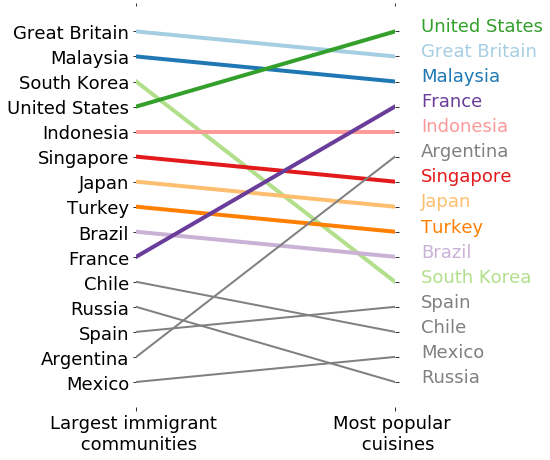

Brazil


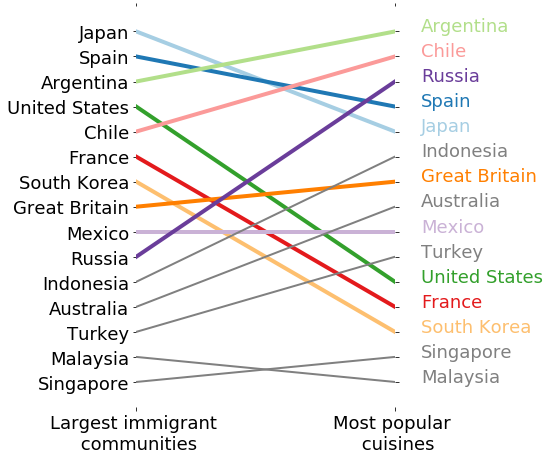

Chile


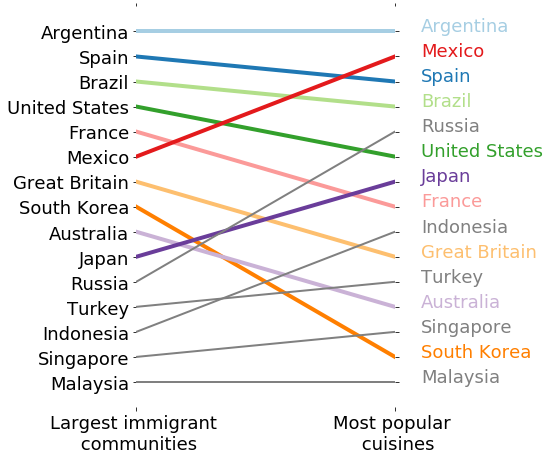

France


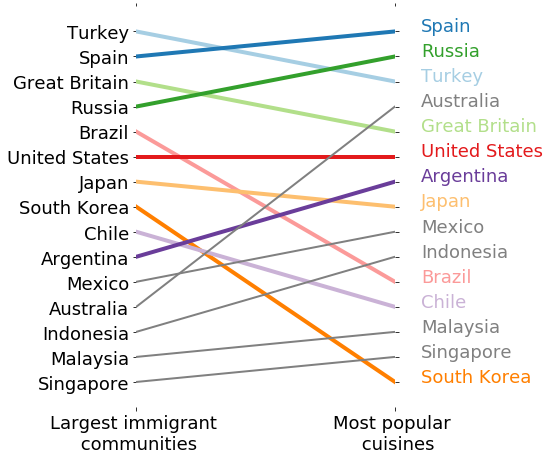

Great Britain


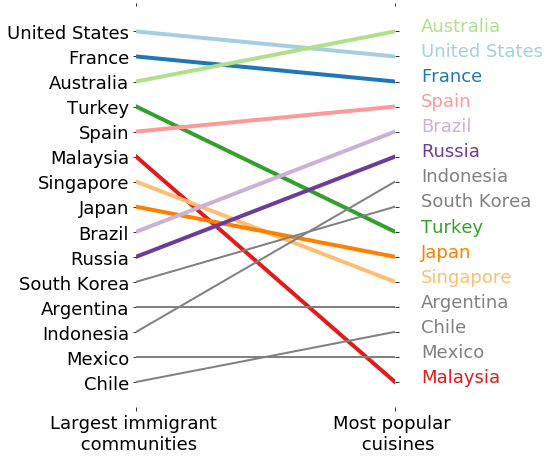

Indonesia


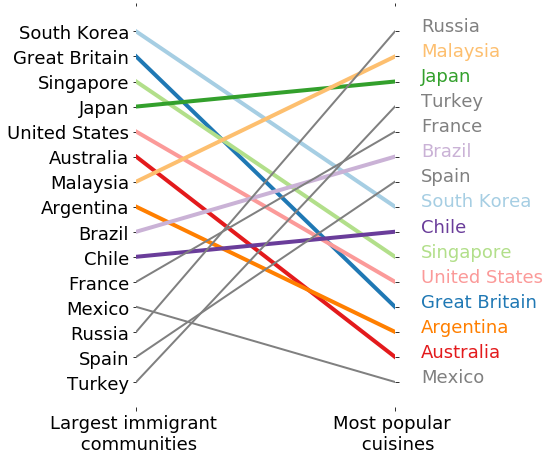

Japan


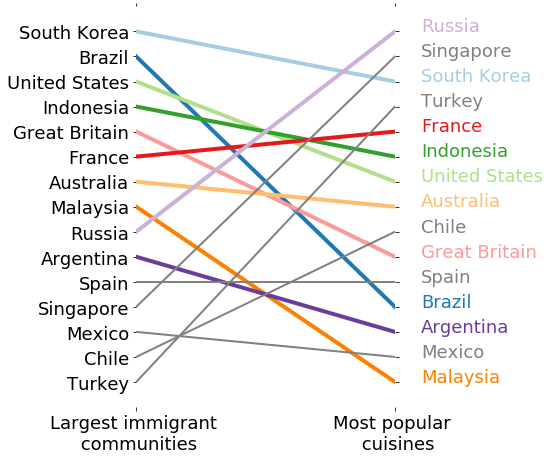

Malaysia


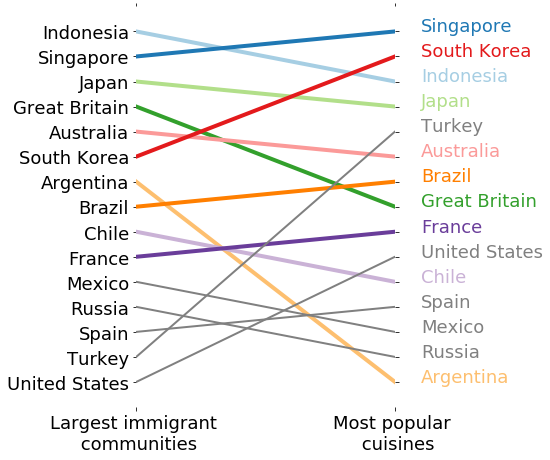

Mexico


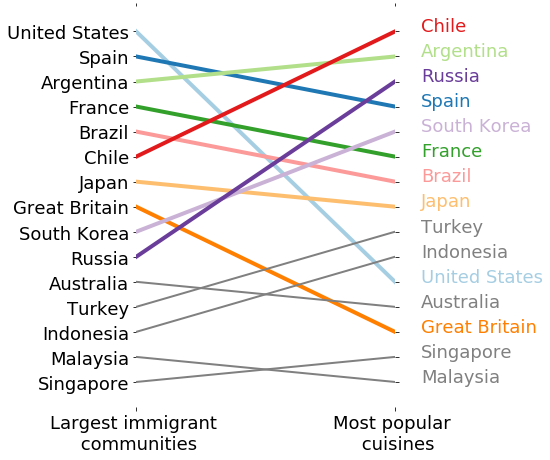

Russia


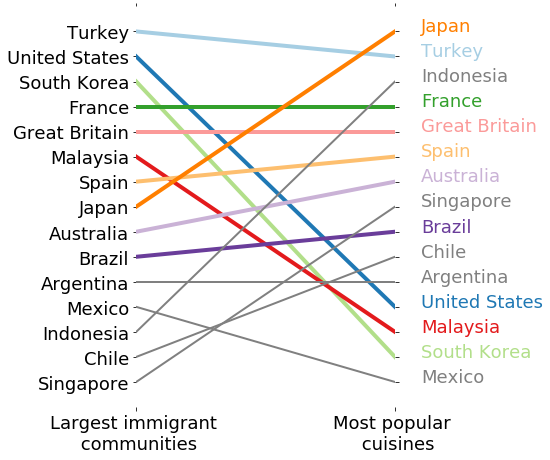

Singapore


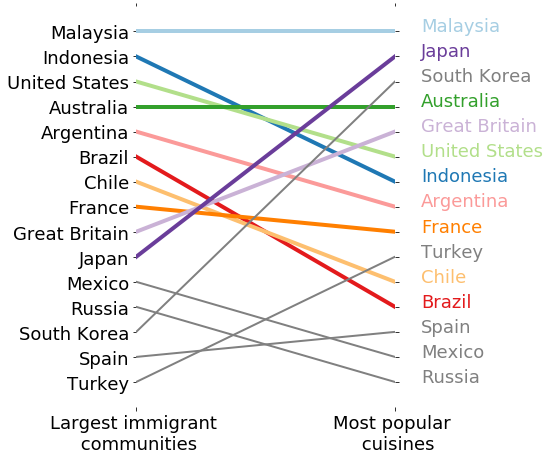

South Korea


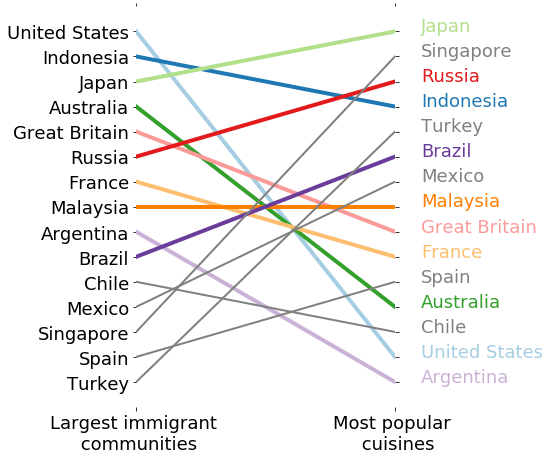

Spain


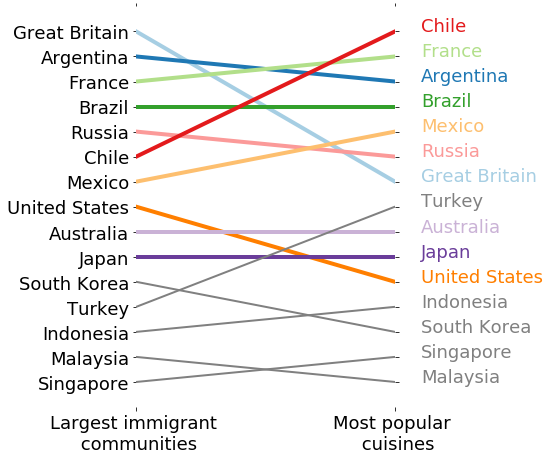

Turkey


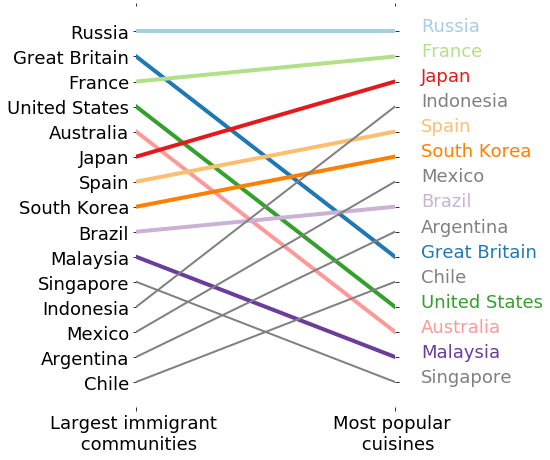

United States


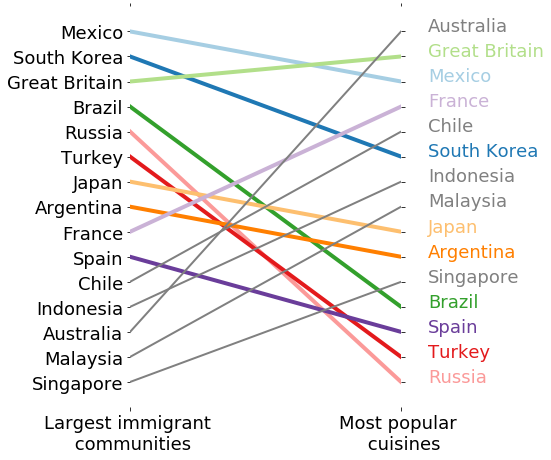

In [22]:
plt.rcParams["figure.figsize"] = (8, 6.5)

r_mig_dest = dict()
r_cs_column = dict()

for country in mig_dest_dict_sorted:
    r_mig_dest[country] = list(mig_dest_dict_sorted[country].keys())
    r_cs_column[country] = list(cs_column_dict_sorted[country].keys())
                             
for country in mig_dest_dict:
    print(country)
    plot_ranking(r_mig_dest[country], r_cs_column[country], country, name="in", note="Column")

## Correlation between Spearman (%imm/pop, Asymmetric CS) and  number of immigrants

In [23]:
corr_mig_data = pd.DataFrame.from_dict(corr_dict, orient='index').merge(migration_data[["Total", "Total16"]], left_index=True, right_index=True)

corr_mig_data

,Spearmanr,p-value,Proportion,Total,Total16
Argentina,0.61,0.02,0.6,2212879,397927
Australia,0.65,0.01,0.8,7549270,2109825
Brazil,0.54,0.04,0.8,807006,229897
Chile,0.74,0.00,0.6,939992,177893
France,0.65,0.01,0.8,8334875,1110686
Great Britain,0.62,0.01,0.8,9552110,1073094
Indonesia,-0.17,0.55,0.2,353135,135623
Japan,0.08,0.78,0.2,2498891,836055
Malaysia,0.75,0.00,0.6,3430380,1356249
Mexico,0.55,0.03,0.4,1060707,837281


In [24]:
corr_mig_data[["Spearmanr", "Total", "Total16"]].corr(method="spearman")

,Spearmanr,Total,Total16
Spearmanr,1.000000,0.125092,0.429728
Total,0.125092,1.000000,0.405882
Total16,0.429728,0.405882,1.000000


In [25]:
corr_mig_data[["Spearmanr", "Total", "Total16"]].drop("United States").corr(method="spearman")

,Spearmanr,Total,Total16
Spearmanr,1.000000,0.312779,0.689902
Total,0.312779,1.000000,0.278571
Total16,0.689902,0.278571,1.000000
